In [48]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
import random
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [49]:
df = pd.read_csv('houses_to_rent.csv')

In [50]:
df2 = pd.read_csv('houses_to_rent_v2.csv')

In [51]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   object
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   object
 13  total           6080 non-null   object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB
None


,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [52]:
df2

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


# Data cleaning and prep for training model 

In [53]:
df.drop(columns='Unnamed: 0',inplace=True)

In [54]:
df2.rename(columns={'hoa (R$)':'hoa', 'rent amount (R$)':'rent amount', 'property tax (R$)':'property tax', 'fire insurance (R$)':'fire insurance', 'total (R$)':'total'}, inplace=True)
df2

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [55]:
columns_to_strip = ['hoa', 'rent amount', 'property tax', 'fire insurance', 'total']

for col in columns_to_strip:
    df[col] = df[col].str.lstrip('R$') #gets rid of R$ symbols
    df[col] = df[col].str.replace(',','') #since you cant convert string to numeric cuz of comma  with '.astype(float)' method, the only way to do it is with replace
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,0,8000,1000,121,9121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,1,19,1,1,0,-,not acept,not furnished,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,acept,not furnished,420,1150,0,15,1585
6076,1,84,2,2,1,16,not acept,furnished,768,2900,63,37,3768
6077,0,48,1,1,0,13,acept,not furnished,250,950,42,13,1255
6078,1,160,3,2,2,-,not acept,not furnished,0,3500,250,53,3803


In [56]:
df2['city'] = 1 #since in this dataframe every row is city convert everything into 1 (means its a city)
df2

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,1,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,1,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,1,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,1,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,1,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,1,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,1,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,1,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


### join two datasets

In [57]:
dfClean = pd.concat([df,df2])
dfClean

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,0,8000,1000,121,9121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,1,19,1,1,0,-,not acept,not furnished,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,1,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,1,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,1,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,1,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [58]:
dfClean.dropna(inplace=True)
dfClean['floor'].replace('-',0,inplace=True) 
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16772 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            16772 non-null  int64 
 1   area            16772 non-null  int64 
 2   rooms           16772 non-null  int64 
 3   bathroom        16772 non-null  int64 
 4   parking spaces  16772 non-null  int64 
 5   floor           16772 non-null  object
 6   animal          16772 non-null  object
 7   furniture       16772 non-null  object
 8   hoa             16772 non-null  object
 9   rent amount     16772 non-null  object
 10  property tax    16772 non-null  object
 11  fire insurance  16772 non-null  object
 12  total           16772 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.8+ MB


In [59]:
columns_to_float_from_int = ['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor']
columns_to_float_from_str = ['hoa', 'rent amount', 'property tax', 'fire insurance', 'total']
for columns in columns_to_float_from_int:
    dfClean[columns] = dfClean[columns].astype(float)
for columns in columns_to_float_from_str:
    dfClean[columns] = pd.to_numeric(dfClean[columns], errors='coerce')
    dfClean[columns] = dfClean[columns].astype(float)
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16772 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            16772 non-null  float64
 1   area            16772 non-null  float64
 2   rooms           16772 non-null  float64
 3   bathroom        16772 non-null  float64
 4   parking spaces  16772 non-null  float64
 5   floor           16772 non-null  float64
 6   animal          16772 non-null  object 
 7   furniture       16772 non-null  object 
 8   hoa             16570 non-null  float64
 9   rent amount     16772 non-null  float64
 10  property tax    16745 non-null  float64
 11  fire insurance  16772 non-null  float64
 12  total           16772 non-null  float64
dtypes: float64(11), object(2)
memory usage: 1.8+ MB


### One hot encoding for animal and furniture

In [60]:
dfClean = pd.get_dummies(dfClean, columns=['animal','furniture'])

In [61]:
print(f' first data: \n{df["city"].value_counts()}')
print("\n")
print(f' second data: \n{df2["city"].value_counts()}')
print("\n")
print(f' they are all cities (df2): {df2["city"].value_counts().sum()}')


 first data: 
1    5249
0     831
Name: city, dtype: int64


 second data: 
1    10692
Name: city, dtype: int64


 they are all cities (df2): 10692


In [62]:
dfClean['city'].value_counts() #big differance between 1's and 0's. You we can't train model on this dataset yet

1.0    15941
0.0      831
Name: city, dtype: int64

## We can see that houses in cities are much more than small towns so we need to fix that by adding balance to data
### How to Handle Imbalanced Data ?


In [63]:
dfClean

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished
0,1.0,240.0,3.0,3.0,4.0,0.0,0.0,8000.0,1000.0,121.0,9121.0,1,0,1,0
1,0.0,64.0,2.0,1.0,1.0,10.0,540.0,820.0,122.0,11.0,1493.0,1,0,0,1
2,1.0,443.0,5.0,5.0,4.0,3.0,4172.0,7000.0,1417.0,89.0,12680.0,1,0,1,0
3,1.0,73.0,2.0,2.0,1.0,12.0,700.0,1250.0,150.0,16.0,2116.0,1,0,0,1
4,1.0,19.0,1.0,1.0,0.0,0.0,0.0,1200.0,41.0,16.0,1257.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,1.0,63.0,2.0,1.0,1.0,5.0,402.0,1478.0,24.0,22.0,1926.0,0,1,1,0
10688,1.0,285.0,4.0,4.0,4.0,17.0,3100.0,15000.0,973.0,191.0,19260.0,1,0,0,1
10689,1.0,70.0,3.0,3.0,0.0,8.0,980.0,6000.0,332.0,78.0,7390.0,0,1,1,0
10690,1.0,120.0,2.0,2.0,2.0,8.0,1585.0,12000.0,279.0,155.0,14020.0,1,0,1,0


In [64]:
dfClean.dropna(inplace=True)

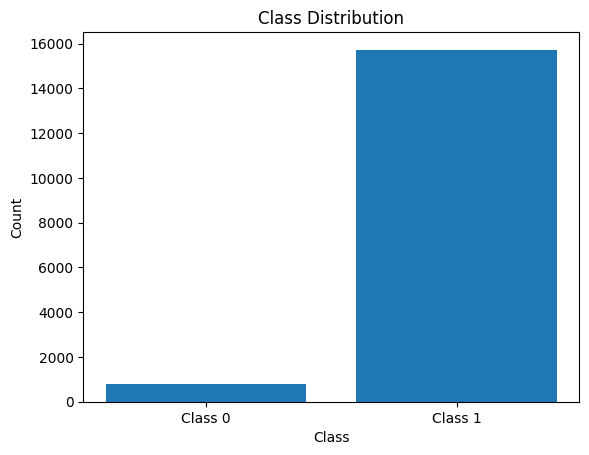

In [65]:
x = dfClean.drop('city', axis=1)
y = dfClean['city']
count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 1', 'Class 0'])
plt.show()

In [66]:
smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(x,y)
y.value_counts()

1.0    15732
0.0    15732
Name: city, dtype: int64

In [67]:
# Convert resampled arrays back to DataFrame
dfResampled = pd.DataFrame(x, columns=x.columns)
dfResampled['city'] = y

In [68]:
dfResampled

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city
0,240.000000,3.000000,3.000000,4.0,0.000000,0.000000,8000.000000,1000.000000,121.000000,9121.000000,1,0,1,0,1.0
1,64.000000,2.000000,1.000000,1.0,10.000000,540.000000,820.000000,122.000000,11.000000,1493.000000,1,0,0,1,0.0
2,443.000000,5.000000,5.000000,4.0,3.000000,4172.000000,7000.000000,1417.000000,89.000000,12680.000000,1,0,1,0,1.0
3,73.000000,2.000000,2.000000,1.0,12.000000,700.000000,1250.000000,150.000000,16.000000,2116.000000,1,0,0,1,1.0
4,19.000000,1.000000,1.000000,0.0,0.000000,0.000000,1200.000000,41.000000,16.000000,1257.000000,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31459,69.728117,2.000000,1.000000,1.0,6.687950,484.739958,981.040167,59.479917,13.000000,1538.260042,0,1,0,1,0.0
31460,53.122210,1.000000,1.000000,0.0,4.731744,477.560347,500.000000,17.000000,7.000000,1001.560347,0,0,0,1,0.0
31461,70.000000,2.722105,1.722105,1.0,4.111579,663.894734,1300.000000,39.715792,17.000000,2020.610527,1,0,0,0,0.0
31462,74.011989,1.665668,1.000000,1.0,0.000000,323.949045,1189.349319,67.355314,15.334332,1595.988011,0,0,0,1,0.0


In [69]:
dfResampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31464 entries, 0 to 31463
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     31464 non-null  float64
 1   rooms                    31464 non-null  float64
 2   bathroom                 31464 non-null  float64
 3   parking spaces           31464 non-null  float64
 4   floor                    31464 non-null  float64
 5   hoa                      31464 non-null  float64
 6   rent amount              31464 non-null  float64
 7   property tax             31464 non-null  float64
 8   fire insurance           31464 non-null  float64
 9   total                    31464 non-null  float64
 10  animal_acept             31464 non-null  uint8  
 11  animal_not acept         31464 non-null  uint8  
 12  furniture_furnished      31464 non-null  uint8  
 13  furniture_not furnished  31464 non-null  uint8  
 14  city                  

In [70]:
columns_to_round = ['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor','hoa','rent amount','property tax','fire insurance','total']
for c in columns_to_round:
    dfResampled[c] = dfResampled[c].round(2)
dfResampled

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city
0,240.00,3.00,3.00,4.0,0.00,0.00,8000.00,1000.00,121.00,9121.00,1,0,1,0,1.0
1,64.00,2.00,1.00,1.0,10.00,540.00,820.00,122.00,11.00,1493.00,1,0,0,1,0.0
2,443.00,5.00,5.00,4.0,3.00,4172.00,7000.00,1417.00,89.00,12680.00,1,0,1,0,1.0
3,73.00,2.00,2.00,1.0,12.00,700.00,1250.00,150.00,16.00,2116.00,1,0,0,1,1.0
4,19.00,1.00,1.00,0.0,0.00,0.00,1200.00,41.00,16.00,1257.00,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31459,69.73,2.00,1.00,1.0,6.69,484.74,981.04,59.48,13.00,1538.26,0,1,0,1,0.0
31460,53.12,1.00,1.00,0.0,4.73,477.56,500.00,17.00,7.00,1001.56,0,0,0,1,0.0
31461,70.00,2.72,1.72,1.0,4.11,663.89,1300.00,39.72,17.00,2020.61,1,0,0,0,0.0
31462,74.01,1.67,1.00,1.0,0.00,323.95,1189.35,67.36,15.33,1595.99,0,0,0,1,0.0


## check the correlation

<Axes: >

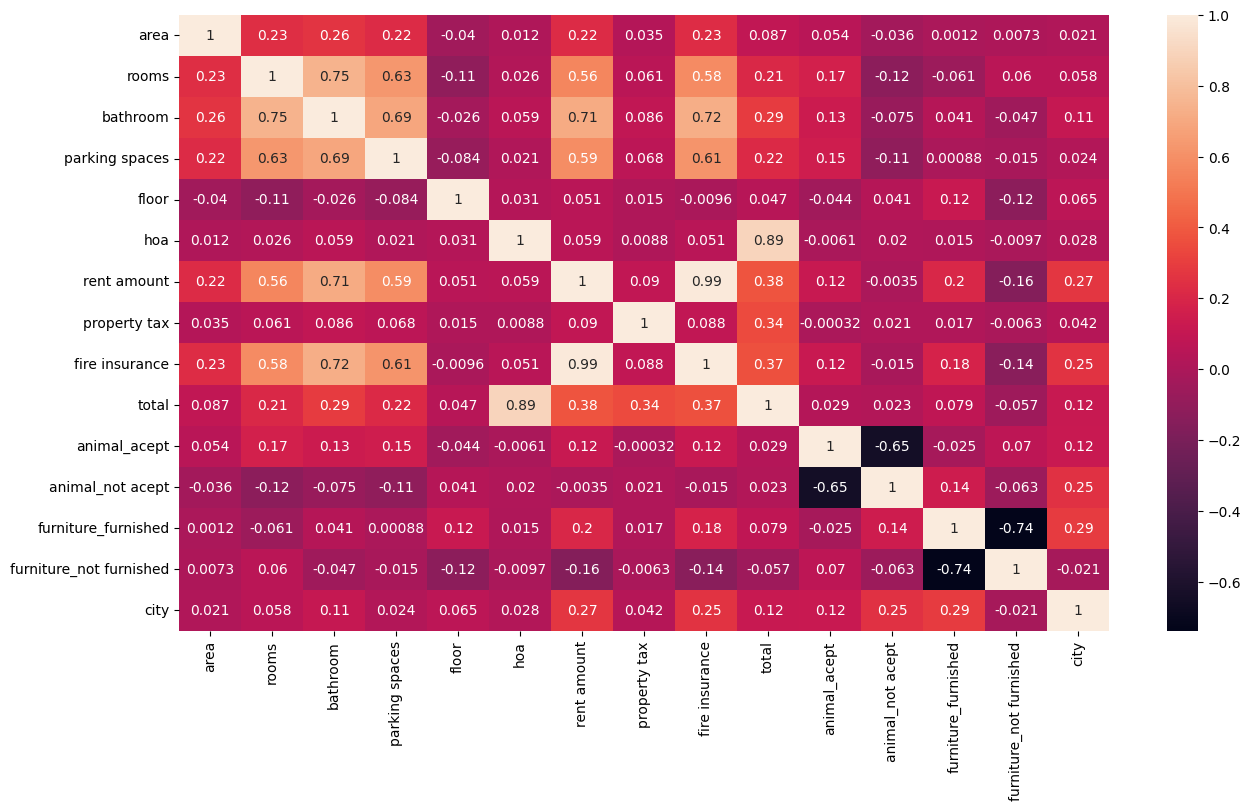

In [71]:
plt.figure(figsize=(15,8))
sns.heatmap(dfResampled.corr(),annot=True)

# splitting it to 3 datasets VALIDATION TRAINING TESTING

In [72]:
Training, Testing = sklearn.model_selection.train_test_split(dfResampled, test_size=0.15, train_size=0.15, shuffle=True)
Testing.count(),Testing.count()

(area                       4720
 rooms                      4720
 bathroom                   4720
 parking spaces             4720
 floor                      4720
 hoa                        4720
 rent amount                4720
 property tax               4720
 fire insurance             4720
 total                      4720
 animal_acept               4720
 animal_not acept           4720
 furniture_furnished        4720
 furniture_not furnished    4720
 city                       4720
 dtype: int64,
 area                       4720
 rooms                      4720
 bathroom                   4720
 parking spaces             4720
 floor                      4720
 hoa                        4720
 rent amount                4720
 property tax               4720
 fire insurance             4720
 total                      4720
 animal_acept               4720
 animal_not acept           4720
 furniture_furnished        4720
 furniture_not furnished    4720
 city                       

In [73]:
Testing

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city
21380,246.66,4.00,4.0,7.38,0.00,0.00,5130.99,317.44,77.46,5525.90,1,0,0,1,0.0
23293,59.63,1.00,1.0,0.96,0.00,0.00,947.41,72.22,14.96,1034.59,1,0,0,1,0.0
14488,134.00,3.00,3.0,2.00,18.00,900.00,3500.00,390.00,45.00,4835.00,1,0,1,0,1.0
24041,75.65,2.42,1.0,0.29,7.74,504.06,994.20,46.24,13.00,1557.50,1,0,0,1,0.0
13005,139.00,3.00,4.0,2.00,12.00,1350.00,11000.00,500.00,140.00,12990.00,0,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22698,63.11,2.00,1.0,1.00,2.02,502.77,864.32,93.63,11.89,1472.61,1,0,0,1,0.0
28646,51.13,2.00,1.0,1.00,2.15,391.41,815.78,21.42,11.00,1239.61,1,0,0,1,0.0
19181,55.00,2.00,1.0,1.00,2.62,380.28,932.44,26.23,12.00,1350.96,1,0,0,1,0.0
11816,27.00,1.00,1.0,0.00,2.00,100.00,960.00,75.00,15.00,1150.00,1,0,0,1,1.0


In [74]:
Training

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city
18070,92.87,3.00,2.00,2.56,10.46,646.05,3612.85,259.78,46.13,4564.81,1,0,0,1,0.0
21959,57.55,1.00,1.00,1.00,5.00,750.00,1227.93,105.75,15.75,2099.43,0,0,0,0,0.0
13001,70.00,3.00,2.00,2.00,16.00,650.00,2500.00,120.00,32.00,3302.00,1,0,1,0,1.0
12073,50.00,1.00,1.00,1.00,8.00,2204.00,3700.00,209.00,47.00,6160.00,0,1,1,0,1.0
25732,113.03,2.53,1.53,2.53,6.28,1342.42,1610.56,160.88,21.00,3134.86,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22096,64.75,2.51,1.00,1.00,3.00,367.04,970.80,37.45,12.51,1387.80,1,0,0,1,0.0
15056,300.00,6.00,8.00,3.00,0.00,0.00,10900.00,1917.00,164.00,12980.00,1,0,0,1,1.0
25456,239.45,3.66,4.00,6.64,0.00,0.00,3210.18,179.98,49.00,3439.16,1,0,0,1,0.0
1008,20.00,1.00,1.00,0.00,5.00,602.00,1800.00,130.00,23.00,2555.00,1,0,1,0,1.0


In [75]:
x = dfResampled.drop('total', axis=1)
y = dfResampled['total']

# Split into validation set (70%) and temporary set (30%)
X_temp, X_val, y_temp, y_val = train_test_split(x, y, test_size=0.70, shuffle=True)

# Split the temporary set into training (15%) and testing (15%)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.50, shuffle=True)


dfTraining = X_train.join(y_train)
dfTesting = X_test.join(y_test)

In [76]:
dfTraining

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city,total
31,120.00,3.00,1.00,4.00,0.00,0.00,3500.00,234.00,53.00,1,0,0,1,1.0,3787.00
1153,100.00,3.00,3.00,1.00,0.00,0.00,2400.00,0.00,37.00,1,0,0,1,1.0,2437.00
17206,75.79,3.00,1.00,1.00,3.10,485.67,877.56,44.49,11.55,1,0,0,1,0.0,1419.27
19893,71.47,2.04,1.04,1.00,2.92,669.15,1132.97,113.41,15.04,1,0,0,1,0.0,1930.57
25223,252.21,3.00,2.00,4.00,0.00,0.00,3500.00,461.23,53.00,0,0,0,1,0.0,4014.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28488,319.38,5.16,4.62,3.54,0.00,0.00,6108.00,341.36,92.62,0,0,0,0,0.0,6541.98
26968,76.97,2.00,1.99,1.01,9.04,725.03,1200.00,71.10,16.00,1,0,0,1,0.0,2012.13
23678,147.15,3.08,2.00,2.00,6.58,947.96,2183.46,230.05,27.83,0,0,0,1,0.0,3389.31
13549,79.00,3.00,2.00,2.00,6.00,550.00,2300.00,50.00,34.00,1,0,1,0,1.0,2934.00


In [77]:
dfTesting

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city,total
3944,50.00,1.00,1.0,1.00,8.0,780.00,1826.00,62.0,24.00,1,0,0,1,0.0,2692.00
7387,160.00,4.00,3.0,2.00,0.0,0.00,3700.00,143.0,61.00,1,0,0,1,1.0,3904.00
592,22.00,1.00,1.0,0.00,0.0,0.00,1074.00,0.0,17.00,0,1,0,1,1.0,1091.00
28538,145.07,2.95,2.0,2.95,11.0,1431.89,1616.99,184.0,20.97,0,0,0,0,0.0,3253.86
6017,44.00,1.00,1.0,1.00,2.0,250.00,1500.00,17.0,22.00,1,0,1,0,1.0,1789.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29969,47.00,1.00,1.0,0.00,8.0,473.00,520.00,13.0,7.00,1,0,0,1,0.0,1013.00
7692,600.00,5.00,7.0,5.00,0.0,0.00,5200.00,155.0,79.00,1,0,0,1,1.0,5434.00
2971,79.00,1.00,2.0,2.00,25.0,800.00,5500.00,199.0,70.00,0,1,1,0,1.0,6569.00
4603,135.00,3.00,2.0,1.00,21.0,950.00,7500.00,77.0,96.00,1,0,1,0,1.0,8623.00


In [78]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Mean Squared Error: 70123.38644866161
R2 Score: 0.9958000536290776


In [79]:
y_pred

array([2700.15063, 4008.25975, 1118.25622, ..., 6563.06623, 8361.45632,
       4552.75843])